In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [106]:
# reviews shape (568454, 10)
reviews = pd.read_csv('/Users/xueyizhu/Desktop/uchicago/third-quarter/Amazon/Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [107]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [108]:
# delete rows that Profile Name is null
reviews = reviews.loc[~reviews['ProfileName'].isnull(), :]
reviews['ProfileName'].isnull().sum()

0

In [109]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568438 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568438 non-null  int64 
 1   ProductId               568438 non-null  object
 2   UserId                  568438 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568438 non-null  int64 
 5   HelpfulnessDenominator  568438 non-null  int64 
 6   Score                   568438 non-null  int64 
 7   Time                    568438 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568438 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


<font color='red'> HelpfulnessNumerator: the total number of users who found the review helpful</font>

<font color='red'> HelpfulnessDenominator: the total number of people who voted whether the review was helpful or not</font>

<font color='red'> HelpfulnessNumerator cannot be greater than HelpfulnessDenominator</font>

In [110]:
reviews = reviews.loc[~(reviews['HelpfulnessNumerator'] > reviews['HelpfulnessDenominator']),:]

In [111]:
# Delete the reviews that did not get any vote - HelpfulnessDenominator
reviews = reviews.loc[reviews['HelpfulnessDenominator'] != 0, :]

In [112]:
reviews['HelpfulnessNumerator'].describe()

count    298396.000000
mean          3.321951
std          10.288423
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

<font color='red'>Consider HelpfulnessNumerator greater than 1 as Helpful (1) else NotHelpful (0)</font>

In [113]:
reviews['HelpfulOrNot'] = [1 if i > 1 else 0 for i in reviews['HelpfulnessNumerator']]
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulOrNot
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,0


Text(0.5, 1.0, 'Helpfulneess Numerator Distribution')

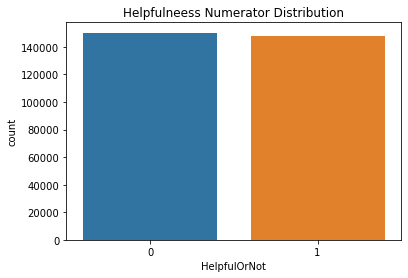

In [114]:
ax = sns.countplot(x = 'HelpfulOrNot', data = reviews, order = reviews['HelpfulOrNot'].value_counts().index)
ax.set_title('Helpfulneess Numerator Distribution')

In [115]:
reviews['HelpfulOrNot'].value_counts(normalize = True)

0    0.503489
1    0.496511
Name: HelpfulOrNot, dtype: float64

Text(0.5, 1.0, 'Score Distribution')

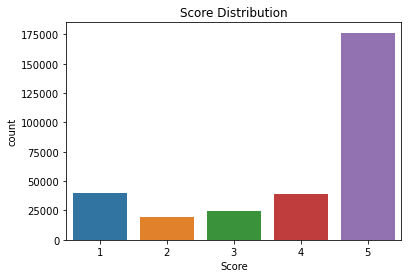

In [116]:
ax = sns.countplot(x = 'Score', data = reviews)
ax.set_title('Score Distribution')

<font color='red'>Based on the plot of score distribution, we can see that most people give score five. </font>

In [117]:
Score_Helpfulness = pd.crosstab(reviews['Score'],reviews['HelpfulOrNot'])
Score_Helpfulness

HelpfulOrNot,0,1
Score,,
1,19347,20653
2,10633,8532
3,13788,10429
4,20985,17653
5,85486,90890


<Figure size 432x288 with 0 Axes>

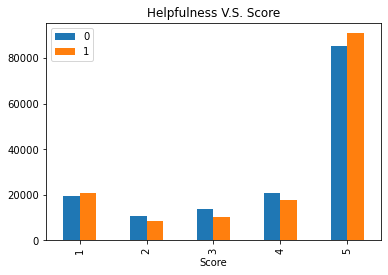

In [118]:
plt.figure()
Score_Helpfulness .plot(kind = 'bar')
plt.legend()
plt.title('Helpfulness V.S. Score')
plt.show()

<font color='red'>Based on the plot of Helpfulness V.S. Score, we can see that for each socre, the difference between the number of 'helpfulness' and the number of 'not helpfullness' is not big. In this case, 'Score' does not contribute much in predicting the 'HelpfulOrNot'. </font>

In [119]:
import re
import string
import nltk
from nltk.corpus import wordnet
# nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
# !pip install unidecode
import unidecode
# !pip install autocorrect
from autocorrect import Speller

In [120]:
#url
def url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [121]:
#html
def html(text):
    return re.compile(r'<.*?>').sub(r'',text)

In [122]:
# punctuation
def pun(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [123]:
# remove accents
def accents(text):
    return unidecode.unidecode(text)

In [124]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9]+','',text)
    return text

In [125]:
# remove extra white spaces between each word
def whitespaces(text):
    return ' '.join(text.split())  

In [126]:
reviews['Text'] = reviews['Text'].apply(lambda x: url(x))
reviews['Text'] = reviews['Text'].apply(lambda x : html(x))
reviews['Text'] = reviews['Text'].apply(lambda x : pun(x))
reviews['Text'] = reviews['Text'].apply(lambda x : accents(x))
reviews['Text'] = reviews['Text'].apply(lambda x: clean(x))
reviews['Text'] = reviews['Text'].apply(lambda x: whitespaces(x))

In [127]:
# stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [128]:
# lemmatizer(remove inflectional endings)
lemmatizer = WordNetLemmatizer()
def lemmatization_text(text):
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
    return text

In [129]:
def clean1(text): 
    text = re.sub(r"wont", "will not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"wasnt", "was not", text)
    text = re.sub(r"arent", "are not", text)
    text = re.sub(r"werent", "were not", text)    
    text = re.sub(r"isnt", "is not", text)
    text = re.sub(r"havent", "have not", text)
    text = re.sub(r"hasnt", "has not", text)
    text = re.sub(r"shouldnt", "should not", text)
    text = re.sub(r"wouldnt", "would not", text)
    text = re.sub(r"didnt", "did not", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"aint", "am not", text)
    return text

In [130]:
reviews['Stopwords'] = reviews['Text'].apply(lambda x: remove_stopwords(x))
reviews['Lemmatization'] = reviews['Stopwords'].apply(lambda x: lemmatization_text(x))
reviews['Lemmatization'] = reviews['Lemmatization'].apply(lambda x: clean1(x))

In [131]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulOrNot,Stopwords,Lemmatization
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0,confection around centuries light pillowy citr...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,1,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now im mostly just sprouting this so my ...,0,right im mostly sprouting cats eat grass love ...,right im mostly sprouting cat eat grass love r...
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,i dont know if its the cactus or the tequila o...,0,dont know cactus tequila unique combination in...,do not know cactus tequila unique combination ...


### Vectorized Features

<font color='red'>CountVectorizer: count the number of times a word appears in the document</font>

<font color='red'>TfidfVectorizer: count how many times a word appears into a document while also paying attention to how many times the same word appears in other documents</font>

In [132]:
from sklearn.model_selection import train_test_split
x = reviews['Lemmatization']
y = reviews['HelpfulOrNot']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.9, shuffle = True)

In [133]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

<font color='red'>1. Unigrams CountVectorizer</font>

In [134]:
# training dataset
count_vectorizer = CountVectorizer(ngram_range = (1, 1), stop_words = 'english', analyzer = 'word', 
                                   max_features = 5000, min_df = 10)
vectors = count_vectorizer.fit_transform(x_train)
count_vect_df = pd.DataFrame(vectors.toarray(), columns = count_vectorizer.get_feature_names())

# StandardScaler the training dataset 
ss = StandardScaler(copy=True, with_mean=False, with_std=True)
count_vect_df = ss.fit_transform(count_vect_df)
count_vect_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
# testing
vectors_test = count_vectorizer.transform(x_test) 
count_vect_test = pd.DataFrame(vectors_test.toarray(), columns = count_vectorizer.get_feature_names())

# StandardScaler the testing datatset 
count_vect_test = ss.transform(count_vect_test)
count_vect_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.32629718, 0.        , ..., 0.        , 0.        ,
        0.        ]])

<font color='red'>2. Unigrams and Bigrams CountVectorizer</font>

In [136]:
# training 
count_vectorizer1 = CountVectorizer(ngram_range = (1, 2), stop_words = 'english',analyzer = 'word',
                                    max_features = 5000, min_df = 10)
vectors1 = count_vectorizer1.fit_transform(x_train)
count_vect_df1 = pd.DataFrame(vectors1.toarray(), columns = count_vectorizer1.get_feature_names())

# StandardScaler the training dataset 
ss1 = StandardScaler(copy=True, with_mean=False, with_std=True)
count_vect_df1 = ss1.fit_transform(count_vect_df1)
count_vect_df1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
# testing 
vectors_test1 = count_vectorizer1.transform(x_test) 
count_vect_test1 = pd.DataFrame(vectors_test1.toarray(), columns = count_vectorizer1.get_feature_names())

# StandardScaler the testing datatset 
count_vect_test1 = ss1.transform(count_vect_test1)
count_vect_test1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  5.32629718, 25.39688147, ...,  0.        ,
         0.        ,  0.        ]])

<font color='red'>3. Unigrams TfidfVectorizer</font>

In [138]:
# training 
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 1), stop_words = 'english', analyzer = 'word',
                                   max_features = 5000, min_df = 10)
vectors2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_vect_df = pd.DataFrame(vectors2.toarray(), columns = tfidf_vectorizer.get_feature_names())

# StandardScaler the training dataset 
ss2 = StandardScaler(copy=True, with_mean=False, with_std=True)
tfidf_vect_df = ss2.fit_transform(tfidf_vect_df)
tfidf_vect_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
# testing
vectors_test2 = tfidf_vectorizer.transform(x_test) 
tfidf_vect_test = pd.DataFrame(vectors_test2.toarray(), columns = tfidf_vectorizer.get_feature_names())

# StandardScaler the testing datatset 
tfidf_vect_test = ss2.transform(tfidf_vect_test)
tfidf_vect_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 4.54052809, 0.        , ..., 0.        , 0.        ,
        0.        ]])

<font color='red'>4. Unigrams and Bigrams TfidfVectorizer</font>

In [141]:
# training
tfidf_vectorizer1 = TfidfVectorizer(ngram_range = (1, 2), stop_words = 'english', analyzer = 'word',
                                   max_features = 5000, min_df = 10)
vectors3 = tfidf_vectorizer1.fit_transform(x_train)
tfidf_vect_df1 = pd.DataFrame(vectors3.toarray(), columns = tfidf_vectorizer1.get_feature_names())

# StandardScaler the training dataset 
ss3 = StandardScaler(copy = True, with_mean = False, with_std = True)
tfidf_vect_df1 = ss3.fit_transform(tfidf_vect_df1)
tfidf_vect_df1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
# testing
vectors_test3 = tfidf_vectorizer1.transform(x_test) 
tfidf_vect_test1 = pd.DataFrame(vectors_test3.toarray(), columns = tfidf_vectorizer1.get_feature_names())

# StandardScaler the testing datatset 
tfidf_vect_test1 = ss3.transform(tfidf_vect_test1)
tfidf_vect_test1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  4.58465258, 19.1665803 , ...,  0.        ,
         0.        ,  0.        ]])

<font color='red'>5. Average Word2Vec</font>

In [148]:
# training 
corpus=[]
for sentence in x_train:
    corpus.append(sentence.split(' '))

In [149]:
from tqdm import tqdm
import os
import gensim
from gensim import models
from gensim.models import Word2Vec

w2v_model = Word2Vec(corpus, min_count = 10, vector_size = 100, workers = 4)
train = []; 
for sent in tqdm(corpus):
    sent_vec = np.zeros(100) 
    cnt_words = 0;
    for word in sent: 
        if word in w2v_model.wv:
            vec = w2v_model.wv.key_to_index[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train.append(sent_vec)
        
print(len(train))
print(len(train[0])) 

100%|██████████| 268556/268556 [00:34<00:00, 7828.26it/s]

268556
100


In [150]:
# testing
corpus1=[]
for sentence in x_test:
    corpus1.append(sentence.split(' '))

In [151]:
test = []; 
for sent in tqdm(corpus1):
    sent_vec = np.zeros(100) 
    cnt_words =0;
    for word in sent: 
        if word in w2v_model.wv:
            vec = w2v_model.wv.key_to_index[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test.append(sent_vec)
    
print(len(test))
print(len(test[0])) 

100%|██████████| 29840/29840 [00:04<00:00, 7004.25it/s]

29840
100


### Model:

#### 1. Logistic Regression: L1

<font color='red'>We chose logistic regression with L1 regularization as L1 regularization can make all the less important features become zero.</font>

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

In [153]:
def logistic_regression_params(train_input, train_output, param_grid, N_FOLDS = 5):
    kfold = KFold(n_splits = N_FOLDS, shuffle = True, random_state = 42)
    lr = LogisticRegression(dual = False, penalty = 'l1',random_state = 42, solver='liblinear')
    lr_best = GridSearchCV(lr, param_grid = param_grid, scoring = 'roc_auc', cv = kfold)
    lr_best.fit(train_input, train_output)
    return lr_best.best_params_, lr_best.cv_results_['mean_test_score']

In [154]:
def confusion_matrix_tt(estimator, train_input, train_output, test_input, test_output):
    plot_confusion_matrix(estimator, train_input, train_output)  
    plt.title('Training Data Confusion Matrix')
    plt.show()
    plot_confusion_matrix(estimator, test_input, test_output)  
    plt.title('Testing Data Confusion Matrix')
    plt.show()

#### 1.1. Unigrams CountVectorizer

In [155]:
param_grid = [{'C': [0.001, 0.01, 0.1, 10]}]
best_params, cv_results = logistic_regression_params(count_vect_df, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params, cv_results

({'C': 0.01}, array([0.61010623, 0.64546445, 0.64385964, 0.64344879]))

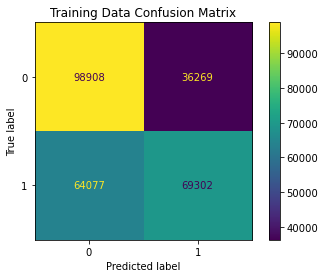

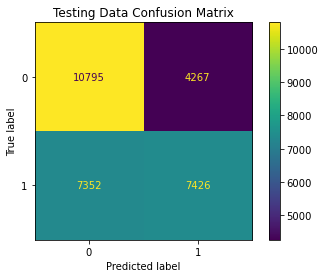

In [156]:
lr = LogisticRegression(max_iter = 3000, C = 0.01, dual = False, penalty = 'l1',random_state = 42, solver='liblinear')
lr.fit(count_vect_df, y_train)
confusion_matrix_tt(lr, count_vect_df, y_train, count_vect_test, y_test)

In [157]:
predicted = lr.predict_proba(count_vect_test)[:,1]
print(roc_auc_score(y_test,predicted))

0.6529338723352148


#### 1.2. Unigrams and Bigrams CountVectorizer

In [158]:
best_params1, cv_results1 = logistic_regression_params(count_vect_df1, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params1, cv_results1

({'C': 0.01}, array([0.61099427, 0.64500295, 0.64342981, 0.64299167]))

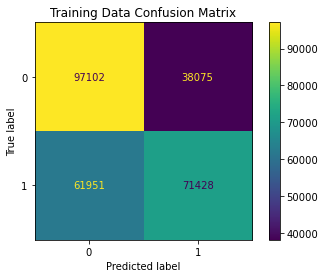

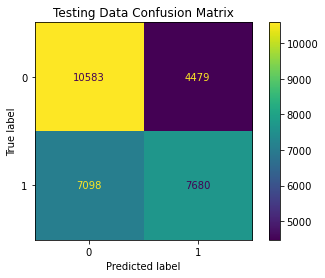

In [159]:
lr1 = LogisticRegression(dual = False, penalty = 'l1',random_state = 42, solver = 'liblinear', max_iter = 3000, C = 0.01)
lr1.fit(count_vect_df1, y_train)
confusion_matrix_tt(lr1, count_vect_df1, y_train, count_vect_test1, y_test)

In [160]:
predicted1 = lr1.predict_proba(count_vect_test1)[:,1]
print(roc_auc_score(y_test, predicted1))

0.6550482438635603


#### 1.3. Unigrams TfidfVectorizer

In [161]:
best_params2, cv_results2 = logistic_regression_params(tfidf_vect_df, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params2, cv_results2

({'C': 0.01}, array([0.60397874, 0.65170382, 0.65109261, 0.65085174]))

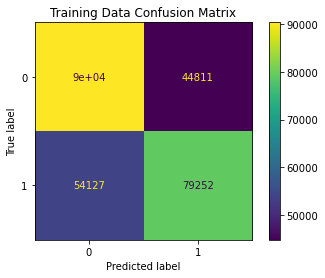

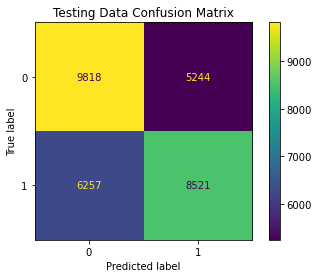

In [162]:
lr2 = LogisticRegression(dual = False, penalty = 'l1',random_state = 42, solver = 'liblinear', max_iter = 3000, C = 0.01)
lr2.fit(tfidf_vect_df, y_train)
confusion_matrix_tt(lr2, tfidf_vect_df, y_train, tfidf_vect_test, y_test)

In [163]:
predicted2 = lr2.predict_proba(tfidf_vect_test)[:,1]
print(roc_auc_score(y_test, predicted2))

0.6590245723909002


#### 1.4. Unigrams and Bigrams TfidfVectorizer

In [164]:
best_params3, cv_results3 = logistic_regression_params(tfidf_vect_df1, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params3, cv_results3

({'C': 0.01}, array([0.60687754, 0.65076949, 0.65029018, 0.65000888]))

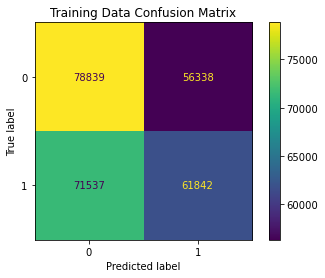

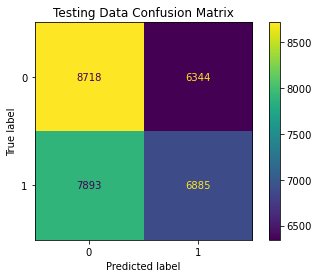

In [165]:
lr3 = LogisticRegression(dual = False, penalty = 'l1',random_state = 42, solver = 'liblinear', max_iter = 3000, C = 0.01)
lr3.fit(tfidf_vect_df1, y_train)
confusion_matrix_tt(lr2, tfidf_vect_df1, y_train, tfidf_vect_test1, y_test)

In [166]:
predicted3 = lr3.predict_proba(tfidf_vect_test1)[:,1]
print(roc_auc_score(y_test, predicted3))

0.6599255580205776


#### 1.5 Average Word2Vec

In [167]:
param_grid = [{'C': [0.001, 0.01, 0.1, 10]}]
best_params4, cv_results4 = logistic_regression_params(train, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params4, cv_results4

({'C': 0.001}, array([0.54934168, 0.54934168, 0.54934168, 0.54934168]))

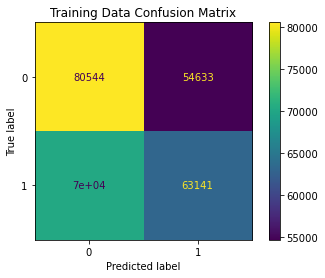

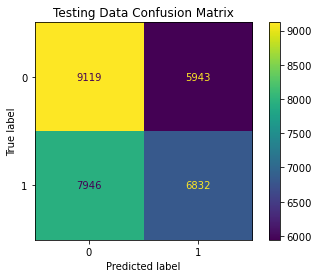

In [168]:
lr4 = LogisticRegression(max_iter = 3000, C = 0.001, dual = False, penalty = 'l1',random_state = 42, solver='liblinear')
lr4.fit(train, y_train)
confusion_matrix_tt(lr4, train, y_train, test, y_test)

In [169]:
predicted4 = lr4.predict_proba(test)[:,1]
print(roc_auc_score(y_test,predicted4))

0.5487484769723138


<font color='red'>Unigrams and Bigrams TfidfVectorizer has the highest roc auc score, and Average Word2Vec has the lowest roc auc score.</font>

#### 2. Support Vector Machine

In [170]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [171]:
def SVM_params(train_input, train_output, test_input, test_output):
    test_auc = []
    alpha_list = [0.01, 0.1, 1, 10]
    for i in alpha_list:
        base_model = SGDClassifier(alpha = i)
        svm = CalibratedClassifierCV(base_estimator = base_model, cv = 5)
        svm.fit(train_input, train_output)
        predict = svm.predict_proba(test_input)[:,1]
        test_auc.append(roc_auc_score(test_output, predict))
    return alpha_list[test_auc.index(max(test_auc))]

#### 2.1. Unigrams CountVectorizer

In [173]:
best_params = SVM_params(count_vect_df, y_train, count_vect_test, y_test)
best_params

0.1

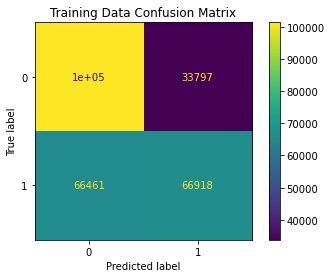

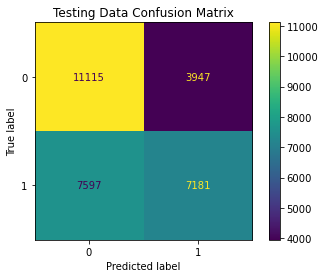

In [174]:
base_model = SGDClassifier(alpha = best_params)
svm = CalibratedClassifierCV(base_estimator = base_model, cv = 5)
svm.fit(count_vect_df, y_train)
confusion_matrix_tt(svm, count_vect_df, y_train, count_vect_test, y_test)

In [175]:
predicted5 = svm.predict_proba(count_vect_test)[:,1]
print(roc_auc_score(y_test,predicted5))

0.6578835157624032


#### 2.2. Unigrams and Bigrams CountVectorizer

In [176]:
best_params1 = SVM_params(count_vect_df1, y_train, count_vect_test1, y_test)
best_params1

0.1

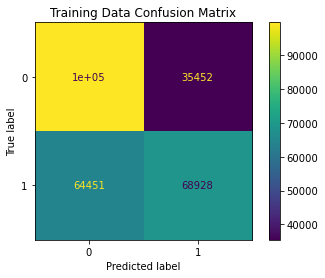

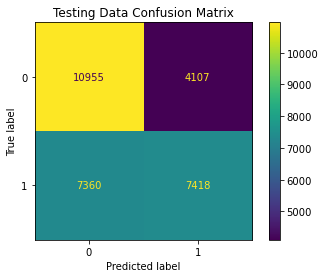

In [177]:
base_model1 = SGDClassifier(alpha = best_params1)
svm1 = CalibratedClassifierCV(base_estimator = base_model1, cv = 5)
svm1.fit(count_vect_df1, y_train)
confusion_matrix_tt(svm1, count_vect_df1, y_train, count_vect_test1, y_test)

In [178]:
predicted6 = svm1.predict_proba(count_vect_test1)[:,1]
print(roc_auc_score(y_test, predicted6))

0.6592121154337683


#### 2.3. Unigrams TfidfVectorizer

In [179]:
best_params2 = SVM_params(tfidf_vect_df, y_train, tfidf_vect_test, y_test)
best_params2

0.1

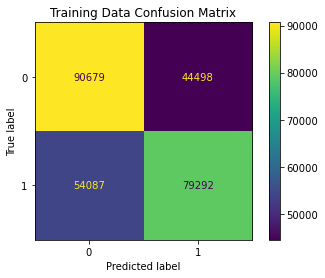

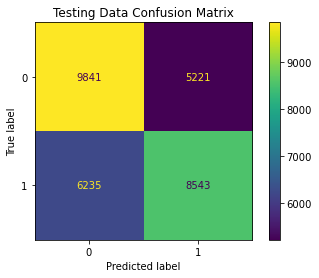

In [180]:
base_model2 = SGDClassifier(alpha = best_params2)
svm2 = CalibratedClassifierCV(base_estimator = base_model2, cv = 5)
svm2.fit(tfidf_vect_df, y_train)
confusion_matrix_tt(svm2, tfidf_vect_df, y_train, tfidf_vect_test, y_test)

In [181]:
predicted7 = svm2.predict_proba(tfidf_vect_test)[:,1]
print(roc_auc_score(y_test, predicted7))

0.6595688715451391


#### 2.4. Unigrams and Bigrams TfidfVectorizer

In [182]:
best_params3 = SVM_params(tfidf_vect_df1, y_train, tfidf_vect_test1, y_test)
best_params3

0.01

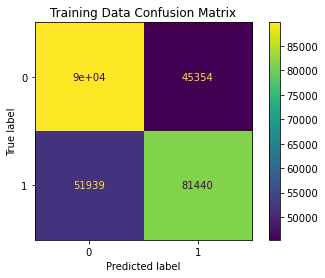

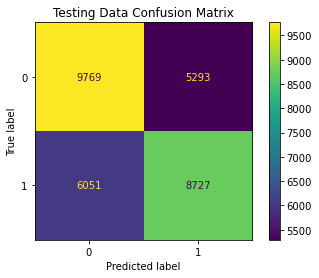

In [183]:
base_model3 = SGDClassifier(alpha = best_params3)
svm3 = CalibratedClassifierCV(base_estimator = base_model3, cv = 5)
svm3.fit(tfidf_vect_df1, y_train)
confusion_matrix_tt(svm3, tfidf_vect_df1, y_train, tfidf_vect_test1, y_test)

In [184]:
predicted8 = svm3.predict_proba(tfidf_vect_test1)[:,1]
print(roc_auc_score(y_test, predicted8))

0.6611940169561967


#### 2.5. Average Word2Vec

In [185]:
best_params4 = SVM_params(train, y_train, test, y_test)
best_params4

0.01

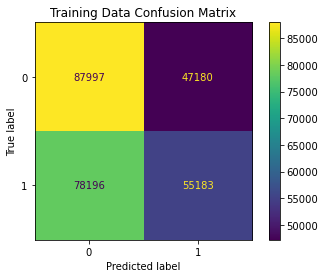

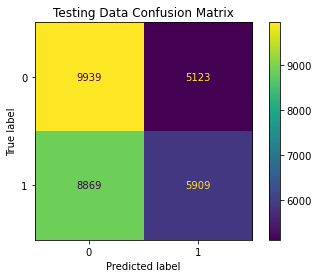

In [186]:
base_model4 = SGDClassifier(alpha = best_params4)
svm4 = CalibratedClassifierCV(base_estimator = base_model4, cv = 5)
svm4.fit(train, y_train)
confusion_matrix_tt(svm4, train, y_train, test, y_test)

In [ ]:
predicted9 = svm4.predict_proba(test)[:,1]
print(roc_auc_score(y_test, predicted9))

<font color='red'>Unigrams and Bigrams TfidfVectorizer has the highest roc auc score, and Average Word2Vec has the lowest roc auc score.</font>

#### 3. Multinomial Naive Bayes

In [188]:
from sklearn.naive_bayes import MultinomialNB

In [189]:
def mnb_params(train_input, train_output, param_grid, N_FOLDS = 5):
    kfold = KFold(n_splits = N_FOLDS, shuffle = True, random_state = 42)
    mnb = MultinomialNB()
    mnb_best = GridSearchCV(mnb, param_grid = param_grid, scoring = 'roc_auc', cv = kfold)
    mnb_best.fit(train_input, train_output)
    return mnb_best.best_params_, mnb_best.cv_results_['mean_test_score']

#### 3.1 Unigrams CountVectorizer

In [190]:
param_grid = [{'alpha': [0.001, 0.01, 0.1, 1]}]
best_params, cv_results = mnb_params(count_vect_df, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params, cv_results

({'alpha': 0.1}, array([0.59816225, 0.59816202, 0.59816229, 0.59815878]))

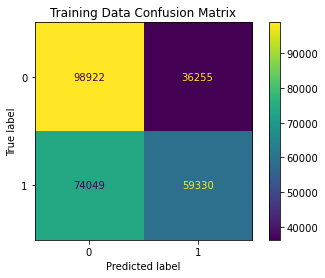

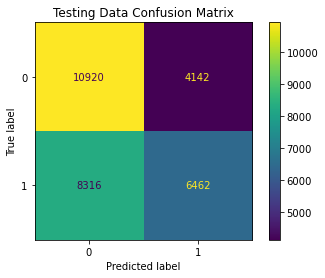

In [191]:
mnb = MultinomialNB(alpha = 0.1)
mnb.fit(count_vect_df, y_train)
confusion_matrix_tt(mnb, count_vect_df, y_train, count_vect_test, y_test)

In [192]:
predicted10 = mnb.predict_proba(count_vect_test)[:,1]
print(roc_auc_score(y_test,predicted10))

0.6027923262964023


#### 3.2. Unigrams and Bigrams CountVectorizer

In [193]:
best_params1, cv_results1 = mnb_params(count_vect_df1, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params1, cv_results1

({'alpha': 1}, array([0.60197852, 0.6019785 , 0.60197842, 0.6019798 ]))

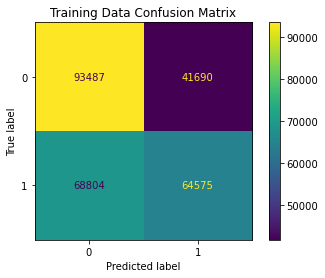

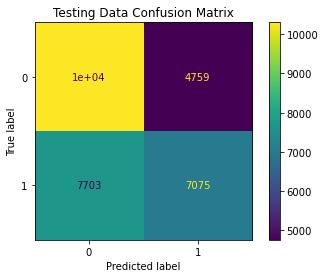

In [194]:
mnb1 = MultinomialNB(alpha = 1)
mnb1.fit(count_vect_df1, y_train)
confusion_matrix_tt(mnb1, count_vect_df1, y_train, count_vect_test1, y_test)

In [195]:
predicted11 = mnb1.predict_proba(count_vect_test1)[:,1]
print(roc_auc_score(y_test,predicted11))

0.6040368888757344


#### 3.3. Unigrams TfidfVectorizer

In [196]:
best_params2, cv_results2 = mnb_params(tfidf_vect_df, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params2, cv_results2

({'alpha': 1}, array([0.62115066, 0.62115065, 0.62115069, 0.62115691]))

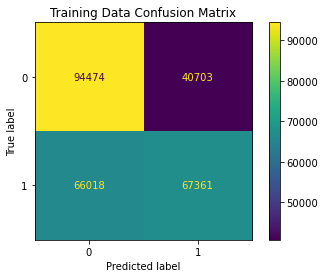

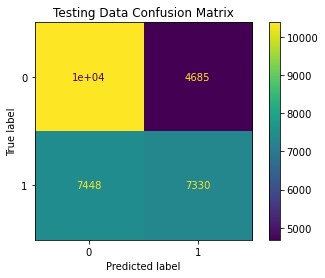

In [197]:
mnb2 = MultinomialNB(alpha = 1)
mnb2.fit(tfidf_vect_df, y_train)
confusion_matrix_tt(mnb2, tfidf_vect_df, y_train, tfidf_vect_test, y_test)

In [198]:
predicted12 = mnb2.predict_proba(tfidf_vect_test)[:,1]
print(roc_auc_score(y_test,predicted12))

0.6256026136315096


#### 3.4. Unigrams and Bigrams TfidfVectorizer

In [199]:
best_params3, cv_results3 = mnb_params(tfidf_vect_df1, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params3, cv_results3

({'alpha': 1}, array([0.62102701, 0.62102705, 0.6210294 , 0.62103079]))

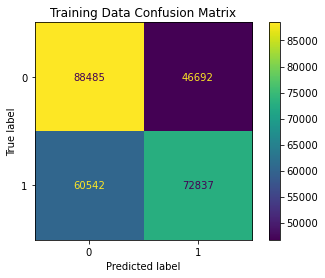

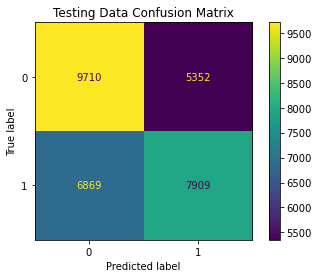

In [200]:
mnb3 = MultinomialNB(alpha = 1)
mnb3.fit(tfidf_vect_df1, y_train)
confusion_matrix_tt(mnb3, tfidf_vect_df1, y_train, tfidf_vect_test1, y_test)

In [201]:
predicted13 = mnb3.predict_proba(tfidf_vect_test1)[:,1]
print(roc_auc_score(y_test, predicted13))

0.6244549168799458


#### 3.5 Average Word2Vec

In [202]:
best_params4, cv_results4 = mnb_params(train, y_train, param_grid = param_grid, N_FOLDS = 5)
best_params4, cv_results4

({'alpha': 1}, array([0.50075174, 0.49805795, 0.48798318, 0.50765156]))

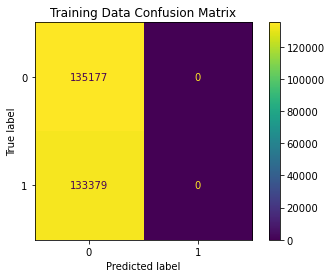

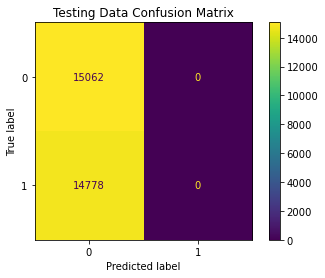

In [203]:
mnb4 = MultinomialNB(alpha = 1)
mnb4.fit(train, y_train)
confusion_matrix_tt(mnb4, train, y_train, test, y_test)

In [204]:
predicted14 = mnb4.predict_proba(test)[:,1]
print(roc_auc_score(y_test, predicted14))

0.47496262302580106


<font color='red'>Unigrams TfidfVectorizer has the highest roc auc score, and Average Word2Vec has the lowest roc auc score.</font>

#### 4. Extremely Randomized Trees

<font color='red'>The difference between random forest and extremely randomized trees is that random forest chooses the optimum split while extremely randomized trees chooses it randomly. But, once the split points are selected, both of these algorithms choose the best one between all the subset of features.</font>

<font color='red'>The randomness in extremly randomized trees comes from the random splits instead of boostrapping the data.</font>

In [205]:
from sklearn.ensemble import ExtraTreesClassifier

#### 4.1. Unigrams CountVectorizer

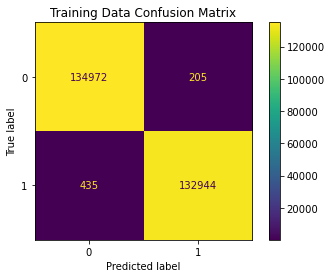

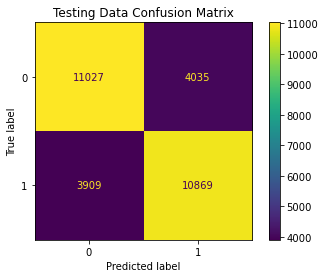

In [206]:
etc = ExtraTreesClassifier(random_state = 42, n_estimators = 70)
etc.fit(count_vect_df, y_train)
confusion_matrix_tt(etc, count_vect_df, y_train, count_vect_test, y_test)

In [207]:
predicted15 = etc.predict_proba(count_vect_test)[:,1]
print(roc_auc_score(y_test,predicted15))

0.8434290878614795


#### 4.2. Unigrams and Bigrams CountVectorizer

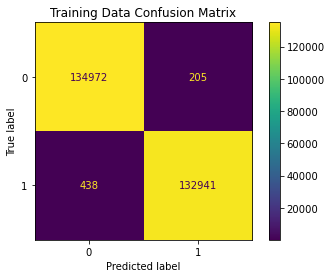

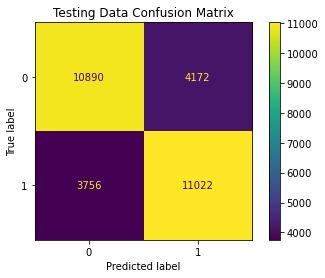

In [208]:
etc1 = ExtraTreesClassifier(random_state = 42, n_estimators = 70)
etc1.fit(count_vect_df1, y_train)
confusion_matrix_tt(etc1, count_vect_df1, y_train, count_vect_test1, y_test)

In [209]:
predicted16 = etc1.predict_proba(count_vect_test1)[:,1]
print(roc_auc_score(y_test,predicted16))

0.8427628808997876


#### 4.3. Unigrams TfidfVectorizer

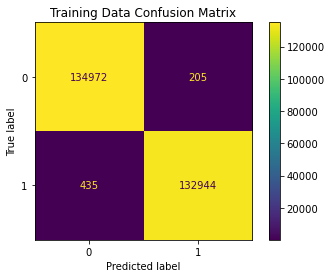

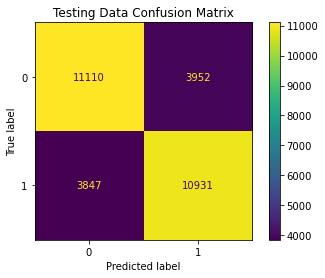

In [210]:
etc2 = ExtraTreesClassifier(random_state = 42, n_estimators = 70)
etc2.fit(tfidf_vect_df, y_train)
confusion_matrix_tt(etc2, tfidf_vect_df, y_train, tfidf_vect_test, y_test)

In [211]:
predicted17 = etc2.predict_proba(tfidf_vect_test)[:,1]
print(roc_auc_score(y_test,predicted17))

0.8471714980615423


#### 4.4. Unigrams and Bigrams TfidfVectorizer

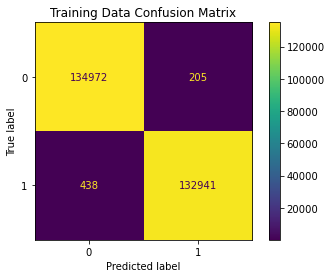

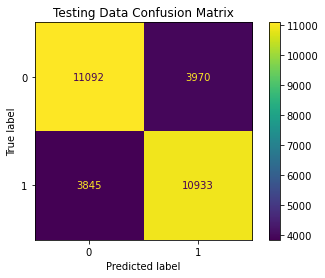

In [212]:
etc3 = ExtraTreesClassifier(random_state = 42, n_estimators = 70)
etc3.fit(tfidf_vect_df1, y_train)
confusion_matrix_tt(etc3, tfidf_vect_df1, y_train, tfidf_vect_test1, y_test)

In [213]:
predicted18 = etc3.predict_proba(tfidf_vect_test1)[:,1]
print(roc_auc_score(y_test, predicted18))

0.8465217723525367


#### 4.5 Average Word2Vec

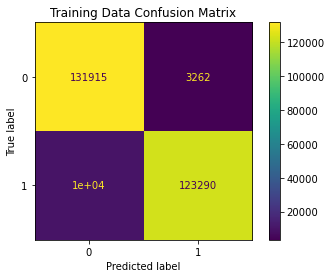

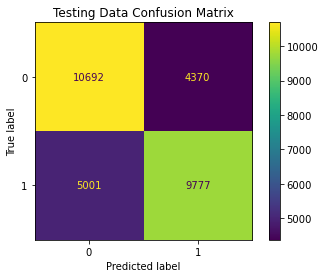

In [214]:
etc4 = ExtraTreesClassifier(random_state = 42, n_estimators = 70)
etc4.fit(train, y_train)
confusion_matrix_tt(etc4, train, y_train, test, y_test)

In [215]:
predicted19 = etc4.predict_proba(test)[:,1]
print(roc_auc_score(y_test, predicted19))

0.7343972944490601


<font color='red'>Unigrams TfidfVectorizer has the highest roc auc score, and Average Word2Vec has the lowest roc auc score.</font>

#### Comparison

In [241]:
results = {'Logistic Regression': [0.65293, 0.65505, 0.65903, 0.65993, 0.54875],
            'Support Vector Machine': [0.65788, 0.65921, 0.65957, 0.66120, 0.54875],
            'Multinomial Naive Bayes': [0.60279, 0.60404, 0.62560, 0.62446, 0.47496],
            'Extremely Randomized Trees': [0.84343, 0.84276, 0.84717, 0.84652, 0.73440]}

In [242]:
results_df = pd.DataFrame(results, index = ['Unigrams CountVectorizer', 'Unigrams and Bigrams CountVectorizer', 
                                            'Unigrams TfidfVectorizer', 'Unigrams and Bigrams TfidfVectorizer',
                                            'Average Word2Vec'])

In [243]:
results_df.reset_index(inplace = True)
results_df = results_df.rename(columns = {'index': 'Countvectorizer'})
results_df

,Countvectorizer,Logistic Regression,Support Vector Machine,Multinomial Naive Bayes,Extremely Randomized Trees
0,Unigrams CountVectorizer,0.65293,0.65788,0.60279,0.84343
1,Unigrams and Bigrams CountVectorizer,0.65505,0.65921,0.60404,0.84276
2,Unigrams TfidfVectorizer,0.65903,0.65957,0.62560,0.84717
3,Unigrams and Bigrams TfidfVectorizer,0.65993,0.66120,0.62446,0.84652
4,Average Word2Vec,0.54875,0.54875,0.47496,0.73440


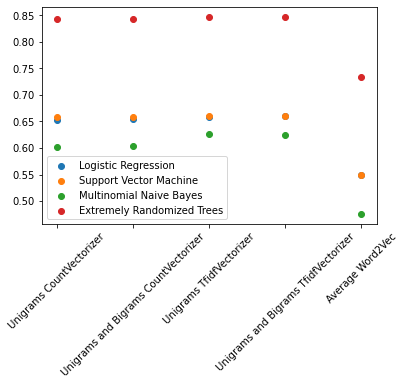

In [244]:
plt.scatter(results_df['Countvectorizer'], y = results_df['Logistic Regression'])
plt.scatter(results_df['Countvectorizer'], y = results_df['Support Vector Machine'])
plt.scatter(results_df['Countvectorizer'], y = results_df['Multinomial Naive Bayes'])
plt.scatter(results_df['Countvectorizer'], y = results_df['Extremely Randomized Trees'])
plt.xticks(rotation = 45)
plt.legend(['Logistic Regression', 'Support Vector Machine', 'Multinomial Naive Bayes', 'Extremely Randomized Trees'])
plt.show()

<font color='red'>Compared to other classifiers, extremely randomized trees consistently performed better.</font>

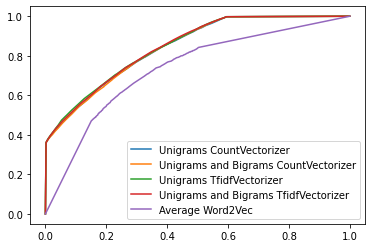

In [246]:
# extremely randomized trees
from sklearn import metrics
fetc, tetc, _ = metrics.roc_curve(y_test, etc.predict_proba(count_vect_test)[:,1])
fetc1, tetc1, _ = metrics.roc_curve(y_test, etc1.predict_proba(count_vect_test1)[:,1])
fetc2, tetc2, _ = metrics.roc_curve(y_test, etc2.predict_proba(tfidf_vect_test)[:,1])
fetc3, tetc3, _ = metrics.roc_curve(y_test, etc3.predict_proba(tfidf_vect_test1)[:,1])
fetc4, tetc4, _ = metrics.roc_curve(y_test, etc4.predict_proba(test)[:,1])

plt.plot(fetc, tetc,label = 'Unigrams CountVectorizer')
plt.plot(fetc1, tetc1,label = 'Unigrams and Bigrams CountVectorizer')
plt.plot(fetc2, tetc2,label = 'Unigrams TfidfVectorizer')
plt.plot(fetc3, tetc3,label = 'Unigrams and Bigrams TfidfVectorizer')
plt.plot(fetc4, tetc4,label = 'Average Word2Vec')
plt.legend(loc=4)
plt.show()